# Automation Tagging Using TF-IDF
### created by Putri Bunga Rahmalita

In [1]:
import pandas as pd 
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [5]:
data = pd.read_csv('seva5.csv')
data.head()

,Title,Author,Released_date,News
0,"Motret Dengan Kamera Smartphone, Lakukan 6 Hal...",Arris Riehady,31 October 2017,Traveling saat ini sudah menjadi gaya hidup ma...
1,Apa yang Terjadi jika Alur Ban Dipasang Terbalik?,admin,30 October 2017,Ada pertanyaan yang sering terdengar ketika me...
2,6 Hal yang Perlu Disiapkan Sebelum Traveling k...,Arris Riehady,20 October 2017,Keindahan alam Indonesia bagian timur bisa dii...
3,"Terobos Banjir, Cek Tips Ini Agar Rem Anda Tid...",admin,09 October 2017,Curah hujan khususnya di Jakarta sudah lumayan...
4,"Pengen Liburan tapi “Mager”, Coba “Staycation”...",Arris Riehady,05 October 2017,Di tengah kesibukan dan kepenatan aktivitas se...


In [6]:
data.shape

(402, 4)

In [7]:
data.isnull().sum()[data.isnull().sum() !=0]

Series([], dtype: int64)

In [8]:
data['word_count'] = data['News'].apply(lambda x: len(str(x).split(" ")))
data[['News','word_count']].head()

,News,word_count
0,Traveling saat ini sudah menjadi gaya hidup ma...,507
1,Ada pertanyaan yang sering terdengar ketika me...,251
2,Keindahan alam Indonesia bagian timur bisa dii...,518
3,Curah hujan khususnya di Jakarta sudah lumayan...,418
4,Di tengah kesibukan dan kepenatan aktivitas se...,422


In [9]:
data.word_count.describe()

count     402.000000
mean      555.542289
std       231.717688
min        24.000000
25%       437.000000
50%       529.500000
75%       651.250000
max      1603.000000
Name: word_count, dtype: float64

In [10]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
 
from nltk.stem.wordnet import WordNetLemmatizer

In [11]:
stop_words=open('stopwords1.txt','r').read()

## Lower case

In [12]:
data['News'] = data['News'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['News'][12]

'teknologi common rail sudah menjadi andalan bagi mobil-mobil diesel modern, misalnya isuzu mu-x. mesin turbo diesel isuzu 2.5l commonrail vgs (variable geometry system)-nya dapat menyemburkan tenaga sebesar 136 ps pada 3.400 rpm dan torsi 32,6 kgm pada putaran 1.800 – 2.800 rpm. mesin diesel common rail juga diklaim membuat bahan bakar lebih irit daripada diesel konvensional karena teknologi common rail memungkinkan tekanan di ruang bakar dapat berubah-ubah alias fleksibel karena menyesuaikan dengan outputnya.pengaturan volume dan tekanan pada mesin yang fleksibel ini membuat percampuran solar dengan udara dan disertai tekanan yang tepat membuat pembakaran menjadi lebih efektif, sehingga gas buang yang dihasilkan relatif sedikit serta lebih ramah lingkungan. akurasi volume solar yang masuk ke ruang bakar juga lebih tepat. “diesel dulu pasti suaranya kasar, asapnya ngebul, lalu berisik. kalau common rail tidak, karena sudah diatur oleh valve dan ecu. jadi pressure yang sangat tinggi su

# Stopwords Removal

In [13]:
stopwords=open('stopwords1.txt','r').read()
data['News'] = data['News'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
data['News'][222]

'generation x (gen x) generasi lahir 1980-an. generasi terbilang tangguh mandiri dibandingkan millenials. x memiliki kencenderungan menabung mereka. namun, mengatur keuangan, mengatur keuangan pribadi mengatur keuangan rumah tangga mengolah dana dimiliki? itu, simak 5 tips mengelola keuangan x referensi dana depan. kekayaan pribadilangkah kekayaan pribadi anda. hitung neraca keuangan pribadi anda, menjumlahkan total aset dimiliki dikurangi hutang tersisa. x, menghitung aset dimiliki wajar, menghitung kekayaan bersih dimiliki, aset potensial memiliki return positif. lupa mencatat penghasilan pengeluaran anda. mudah, lumayan sulit pengeluaran terduga dikeluarkan luput perhitungan bulanan. membangun cadangan keuangansetelah kekayaan pribadi, mudah mengalokasikan uang anda. membangun cadangan keuangan misalnya. melakukannya, satunya berinvestasi. biasanya, x memiliki investasi jangka berumur 35 tahun. itu, membangun cadangan keuangan lainnya, mengambil investasi jangka pendek, deposito, fo

# Punctual Removal

In [14]:
data['News'] = data['News'].replace({'[\W_]+': ' '}, regex=True)
data['News'][222]

'generation x gen x generasi lahir 1980 an generasi terbilang tangguh mandiri dibandingkan millenials x memiliki kencenderungan menabung mereka namun mengatur keuangan mengatur keuangan pribadi mengatur keuangan rumah tangga mengolah dana dimiliki itu simak 5 tips mengelola keuangan x referensi dana depan kekayaan pribadilangkah kekayaan pribadi anda hitung neraca keuangan pribadi anda menjumlahkan total aset dimiliki dikurangi hutang tersisa x menghitung aset dimiliki wajar menghitung kekayaan bersih dimiliki aset potensial memiliki return positif lupa mencatat penghasilan pengeluaran anda mudah lumayan sulit pengeluaran terduga dikeluarkan luput perhitungan bulanan membangun cadangan keuangansetelah kekayaan pribadi mudah mengalokasikan uang anda membangun cadangan keuangan misalnya melakukannya satunya berinvestasi biasanya x memiliki investasi jangka berumur 35 tahun itu membangun cadangan keuangan lainnya mengambil investasi jangka pendek deposito forex trading saham investasi lai

## Rare word removal

In [15]:
rare_word = pd.Series(' '.join(data['News']).split()).value_counts()[-100:]
rare_word = list(rare_word.index)
data['News'] = data['News'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_word))
data['News'].head()

0    traveling gaya hidup perkotaan aktivitas lengk...
1    terdengar mengganti ban apakah memasang alur t...
2    keindahan indonesia timur secuil surga dunia j...
3    curah hujan jakarta lumayan tinggi turun hujan...
4    kesibukan kepenatan aktivitas sehari hari libu...
Name: News, dtype: object

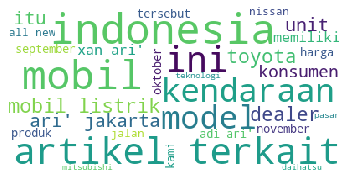

In [16]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=30,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'mobil'),
 Text(0, 0, '2019'),
 Text(0, 0, 'indonesia'),
 Text(0, 0, 'kendaraan'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'jakarta'),
 Text(0, 0, 'unit'),
 Text(0, 0, 'terkait'),
 Text(0, 0, 'listrik'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'model'),
 Text(0, 0, 'ari'),
 Text(0, 0, 'ini'),
 Text(0, 0, 'artikel'),
 Text(0, 0, 'juta'),
 Text(0, 0, 'pt'),
 Text(0, 0, 'nissan'),
 Text(0, 0, '2018'),
 Text(0, 0, 'daihatsu'),
 Text(0, 0, 'dealer')]

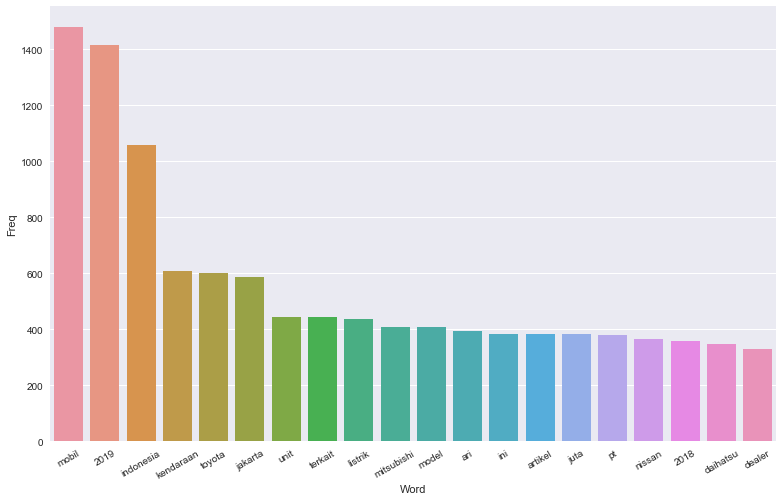

In [17]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                    Bi-gram  Freq
0           artikel terkait   382
1             mobil listrik   268
2                   xan ari   198
3                giias 2019   175
4                   adi ari   157
5                   all new   140
6            september 2019   128
7             november 2019   119
8                 juli 2019   111
9              mobil123 com   101
10                jalan tol    94
11  indonesia international    84
12             oktober 2019    83
13                auto show    82
14       mitsubishi xpander    82
15       gaikindo indonesia    80
16       international auto    79
17             agustus 2019    79
18                 the road    77
19               show giias    75


[Text(0, 0, 'artikel terkait'),
 Text(0, 0, 'mobil listrik'),
 Text(0, 0, 'xan ari'),
 Text(0, 0, 'giias 2019'),
 Text(0, 0, 'adi ari'),
 Text(0, 0, 'all new'),
 Text(0, 0, 'september 2019'),
 Text(0, 0, 'november 2019'),
 Text(0, 0, 'juli 2019'),
 Text(0, 0, 'mobil123 com'),
 Text(0, 0, 'jalan tol'),
 Text(0, 0, 'indonesia international'),
 Text(0, 0, 'oktober 2019'),
 Text(0, 0, 'auto show'),
 Text(0, 0, 'mitsubishi xpander'),
 Text(0, 0, 'gaikindo indonesia'),
 Text(0, 0, 'international auto'),
 Text(0, 0, 'agustus 2019'),
 Text(0, 0, 'the road'),
 Text(0, 0, 'show giias')]

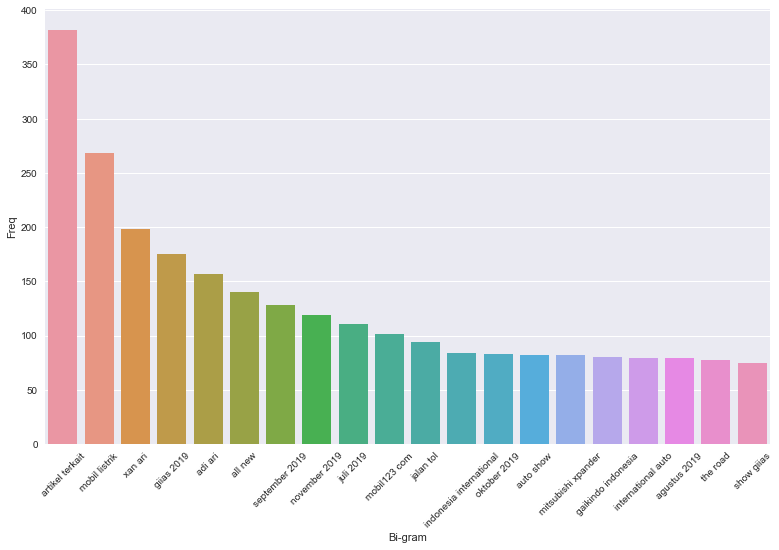

In [18]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                            Tri-gram  Freq
0   gaikindo indonesia international    80
1       indonesia international auto    79
2            international auto show    79
3                    auto show giias    75
4                    show giias 2019    66
5              sport utility vehicle    55
6                        on the road    53
7                utility vehicle suv    51
8                   the road jakarta    51
9              multi purpose vehicle    49
10                toyota astra motor    46
11                   pt toyota astra    42
12                   astra motor tam    40
13                    gran max luxio    34
14            artikel terkait toyota    33
15      kendaraan bermotor indonesia    33
16               purpose vehicle mpv    32
17       gabungan industri kendaraan    32
18       industri kendaraan bermotor    32
19                 pt astra daihatsu    32


[Text(0, 0, 'gaikindo indonesia international'),
 Text(0, 0, 'indonesia international auto'),
 Text(0, 0, 'international auto show'),
 Text(0, 0, 'auto show giias'),
 Text(0, 0, 'show giias 2019'),
 Text(0, 0, 'sport utility vehicle'),
 Text(0, 0, 'on the road'),
 Text(0, 0, 'utility vehicle suv'),
 Text(0, 0, 'the road jakarta'),
 Text(0, 0, 'multi purpose vehicle'),
 Text(0, 0, 'toyota astra motor'),
 Text(0, 0, 'pt toyota astra'),
 Text(0, 0, 'astra motor tam'),
 Text(0, 0, 'gran max luxio'),
 Text(0, 0, 'artikel terkait toyota'),
 Text(0, 0, 'kendaraan bermotor indonesia'),
 Text(0, 0, 'purpose vehicle mpv'),
 Text(0, 0, 'gabungan industri kendaraan'),
 Text(0, 0, 'industri kendaraan bermotor'),
 Text(0, 0, 'pt astra daihatsu')]

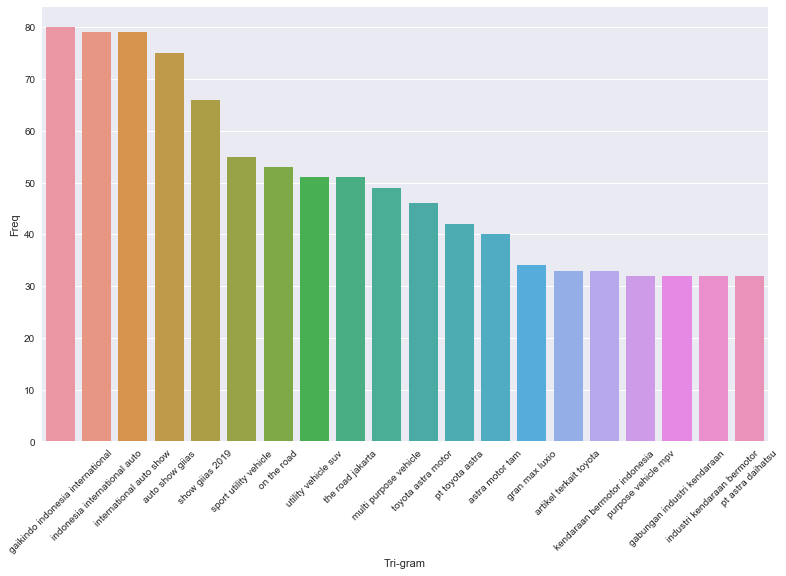

In [19]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Extract with TF-IDF with N-gram 1 sampai 3

In [20]:
test = [data['News'][12]]
title = data['Title'].tolist()
print("\n=====Title=====")
print(title[12])
print("\nAbstract:")
print(test)

vectorizer = CountVectorizer(ngram_range = (1,3)) 
X1 = vectorizer.fit_transform(test)  
features = (vectorizer.get_feature_names())  

vectorizer = TfidfVectorizer(ngram_range = (1,3)) 
X2 = vectorizer.fit_transform(test) 
scores = (vectorizer.get_feature_names()) 

# ambil ranking dari keywordnya
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 

print ("\n==========Keywords==========\n\n", words.head(20))


=====Title=====
Teknologi yang Bikin Mesin Isuzu MU-X Hemat BBM dan Ramah Lingkungan

Abstract:
['teknologi common rail andalan mobil mobil diesel modern isuzu mu x mesin turbo diesel isuzu 2 5l commonrail vgs variable geometry system nya menyemburkan tenaga 136 ps 3 400 rpm torsi 32 6 kgm putaran 1 800 2 800 rpm mesin diesel common rail diklaim bahan bakar irit diesel konvensional teknologi common rail tekanan ruang bakar berubah ubah alias fleksibel menyesuaikan outputnya pengaturan volume tekanan mesin fleksibel percampuran solar udara disertai tekanan pembakaran efektif buang dihasilkan relatif ramah lingkungan akurasi volume solar ruang bakar tepat diesel suaranya kasar asapnya ngebul berisik common rail tidak diatur valve ecu pressure stand by common rail nya konvensional sanusi workshop head isuzu astra biz centre bsd branch ia melanjutkan konsumsi bbm dihasilkan terbilang irit isuzu mu x sehari hari konsumsi bbm mobil bertipe suv mencapai 1 11 km memang tergantung perawatan pe

## Extract keyword with TF-IDF dari 1 sampai 3 (Looping)

In [21]:
test = [data['News'][12]]
title = data['Title'].tolist()
print("\n=====Title=====")
print(title[12])
print("\nAbstract:")
print(test)

for i in range (1,4):
    vectorizer = CountVectorizer(ngram_range = (i,i)) 
    X1 = vectorizer.fit_transform(test)  
    features = (vectorizer.get_feature_names())  

    vectorizer = TfidfVectorizer(ngram_range = (i,i)) 
    X2 = vectorizer.fit_transform(test) 
    scores = (X2.toarray()) 

    sums = X2.sum(axis = 0) 
    data1 = [] 
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 
    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False)) 
    print ("\n==========Keywords==========\n\n", words.head(10))


=====Title=====
Teknologi yang Bikin Mesin Isuzu MU-X Hemat BBM dan Ramah Lingkungan

Abstract:
['teknologi common rail andalan mobil mobil diesel modern isuzu mu x mesin turbo diesel isuzu 2 5l commonrail vgs variable geometry system nya menyemburkan tenaga 136 ps 3 400 rpm torsi 32 6 kgm putaran 1 800 2 800 rpm mesin diesel common rail diklaim bahan bakar irit diesel konvensional teknologi common rail tekanan ruang bakar berubah ubah alias fleksibel menyesuaikan outputnya pengaturan volume tekanan mesin fleksibel percampuran solar udara disertai tekanan pembakaran efektif buang dihasilkan relatif ramah lingkungan akurasi volume solar ruang bakar tepat diesel suaranya kasar asapnya ngebul berisik common rail tidak diatur valve ecu pressure stand by common rail nya konvensional sanusi workshop head isuzu astra biz centre bsd branch ia melanjutkan konsumsi bbm dihasilkan terbilang irit isuzu mu x sehari hari konsumsi bbm mobil bertipe suv mencapai 1 11 km memang tergantung perawatan pe

## One time running (TF-IDF)
Ini buat testing tf-idf nya aja pakai data lain yang sudah ada tagnya

In [106]:
# load data
data = pd.read_csv('mobil123 (0-100).csv')

# cleansing data
data['News'] = data['News'].apply(lambda x: " ".join(x.lower() for x in x.split()))

stopwords=open('stopwords1.txt','r').read()
data['News'] = data['News'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

data['News'] = data['News'].replace({'[\W_]+': ' '}, regex=True)
rare_word = pd.Series(' '.join(data['News']).split()).value_counts()[-100:]
rare_word = list(rare_word.index)
data['News'] = data['News'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_word))
corpus = []

# punctual removal
for i in range(0, 401):
    text = data['News'][i]
    corpus.append(text)

test = [data['News'][1]]

vectorizer = CountVectorizer(ngram_range = (1,3)) 
X1 = vectorizer.fit_transform(test)  
features = (vectorizer.get_feature_names())  

vectorizer = TfidfVectorizer(ngram_range = (1,3)) 
X2 = vectorizer.fit_transform(test) 
scores = (vectorizer.get_feature_names()) 

# ambil ranking dari keywordnya
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 


print("\nTitle:")
print(data['Title'][1])
print("\nTag:")
print(data['Tags'][1])
print ("\n==========Keywords==========\n\n", words.head(10))


Title:
Auto2000 Dapat Layani Recall Toyota Rush di Rumah Pelanggan

Tag:
AUTO2000,RECALL,RECALL TOYOTA,RUSH,TOYOTA RUSH

==========Keywords==========

                term      rank
345          toyota  0.339581
46         auto2000  0.297133
15             2018  0.169791
265          recall  0.127343
272            rush  0.084895
356     toyota rush  0.084895
31           airbag  0.084895
301         service  0.084895
122             ecu  0.084895
331  terkena recall  0.084895


In [2]:
# load data
data = pd.read_csv('sevaclean.csv')

test = [data['News'][90]]

vectorizer = CountVectorizer(ngram_range = (1,3)) 
X1 = vectorizer.fit_transform(test)  
features = (vectorizer.get_feature_names())  

vectorizer = TfidfVectorizer(ngram_range = (1,3)) 
X2 = vectorizer.fit_transform(test) 
scores = (vectorizer.get_feature_names()) 

# ambil ranking dari keywordnya
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 

print("\nTitle:")
print(data['Title'][90])
print ("\n==========Keywords==========\n\n", words.head(10))


Title:
Jalankan Misi Anda Bersama All-New BMW X3

==========Keywords==========

             term      rank
128          bmw  0.577651
163       bmw x3  0.259943
1183          x3  0.259943
67           all  0.216619
69    all bmw x3  0.202178
68       all bmw  0.202178
232      control  0.101089
731         misi  0.101089
749           mm  0.086648
921         road  0.086648


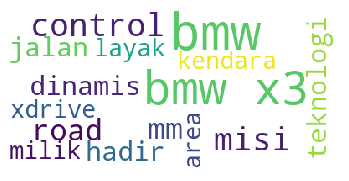

In [28]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          max_words=15,
                          max_font_size=60,
                          random_state=42
                         ).generate(str(data['News'][90]))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)